In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
pcc=[]
for col in df.columns:
    if df[col].dtype==np.int64 or df[col].dtype==np.float64 and col!='tip':
        coeff=np.corrcoef(df[col],df['tip'])[0][1]
        pcc.append((coeff,col))
sorted(pcc,reverse=True)

[(0.6757341092113641, 'total_bill'), (0.48929877523035775, 'size')]

mean for x variable:  19.785942622950824
mean for y variable:  2.9982786885245902
sst =  465.21247704918085
calculated slope:  0.10502451738435341
calculated intercept:  0.9202696135546722


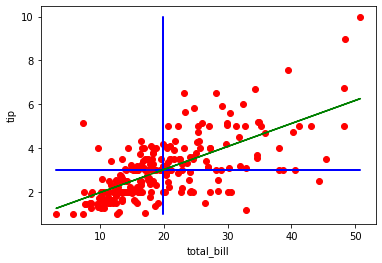

In [6]:
# Looking at the dataset, our dependent (or response) variable is tip while 
# rest of them are our independent or predictor variables
# I wanted to try out simple linear regression first, so I chose the 
# the predictor variable with the highest linear correlation with 'tip'.
x=df[pcc[0][1]]
y=df['tip']
xmean = np.mean(x)
ymean = np.mean(y)
print('mean for x variable: ',xmean)
print('mean for y variable: ',ymean)
plt.scatter(x,y,c='r')
plt.xlabel(pcc[0][1])
plt.ylabel('tip')

#plotting the line passing through mean value
#parallel to x-axis
plt.plot(x,np.full(x.shape,ymean),c='b')
plt.plot(np.full(x.shape,xmean),y,c='b')
#finding total sum of squares
#sst = np.sum((y-ymean)**2)
sst=0
for i in range(len(y)):
    sst+=((y[i]-ymean)**2)
print('sst = ',sst)
# the intersection point in the graph below gives us the 
# point (xmean, ymean)

#calculating slope using least squares method
r1 = np.sum((x-xmean)*(y-ymean)) # equivalent to covariance b/w x and y
r2 = np.sum((x-xmean)**2) # equivalent of variance of x
b1 = r1/r2
b0 = ymean-b1*xmean
print('calculated slope: ',b1)
print('calculated intercept: ',b0)
py = b1*x + b0
plt.plot(x,py,c='g')

In [7]:
#py is the predicted y value from calculated b1 and b0 values
#loss(x,y,b1,b0) finds the sum of square errors
#done by finding the difference between the original and predicted y-values

def loss(x,y,b1,b0):
    #sse = np.sum((y-b1*x-b0)**2)
    sse=0
    for i in range(len(y)):
        sse+=((y[i]-b1*x[i]-b0)**2)
    return sse

#finding r^2 values based on our sse value
#(sst-sse) = ssr
sse = loss(x,y,b1,b0)
r2 = 1-(sse/sst)

# if the r2 value is nearly 1 or closer to it, then our regression line 
# has a good fit w.r.t our dataset
print('r^2 value = ',r2)
print('sum of square errors = ',sse)

# defining the loss function which is, summation of squares of 
# differences b/w prediction value and original y
# and then finding out their mean 
# we can say (sse/n) where n is the no. of data values in dataset

print('b0 calculated using least squares: ',b0)
print('b1 calculated using least squares: ',b1)

#np.seterr(divide='ignore', invalid='ignore')

def optimize_loss(x,y,b1,b0,b_one,b_zero,cost,min_cost):
    n=len(y)
    alpha = 0.0000000001
    iterate = 100
    for i in range(iterate):
        derivative_b1 = (-2/n)*np.sum((y-b1*x-b0)*x)
        derivative_b0 = (-2/n)*np.sum(y-b1*x-b0)
        b1 = b1 - alpha*derivative_b1
        b0 = b0 - alpha*derivative_b0
        b_one.append(b1)
        b_zero.append(b0)
        n_cost=loss(x,y,b1,b0)
        cost.append(n_cost)
        if min_cost is None or min_cost>n_cost:
            b1_min=b1
            b0_min=b0
            min_cost=n_cost
    return b1_min,b0_min
b_one=[]
b_zero=[]
cost=[]
b0=ymean
b1=xmean
min_cost=None
b1,b0 = optimize_loss(x,y,b1,b0,b_one,b_zero,cost,min_cost)
print(b1,b0)
sse = loss(x,y,b1,b0)
sse

r^2 value =  0.4566165863516771
sum of square errors =  252.78874385077597
b0 calculated using least squares:  0.9202696135546722
b1 calculated using least squares:  0.10502451738435341
19.785756638845204 2.998270858890589


44854234.18288959

Text(0, 0.5, 'cost function')

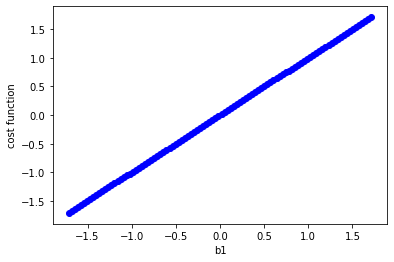

In [8]:
b1i = np.array(b_one)
b0i = np.array(b_zero)
costi=np.array(cost)
#feature scaling using standardization
costi =(costi-np.mean(costi))/np.std(costi)
b1i  = (b1i-np.mean(b1i))/np.std(b1i)
b0i  = (b0i-np.mean(b0i))/np.std(b0i)
plt.scatter(b1i,costi,c='b')
plt.xlabel('b1')
plt.ylabel('cost function')

Text(0, 0.5, 'cost function')

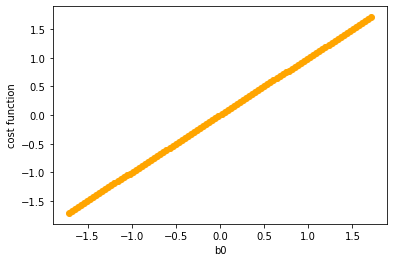

In [9]:
plt.scatter(b0i,costi,c='orange')
plt.xlabel('b0')
plt.ylabel('cost function')

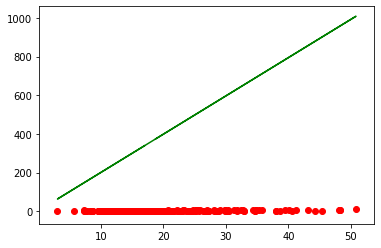

In [10]:
plt.plot(x,b1*x+b0,'g')
plt.scatter(x,y,c='r')

In [14]:
np.ones((4,1))

array([[1.],
       [1.],
       [1.],
       [1.]])